# Notebook  de classification angle_vitesse

## Importation des biblothèques

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import numpy as np 
#import keras
from sklearn.model_selection import train_test_split
from fonctionsUtiles import architecture
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import time
from fonctionsUtiles import functions as f
from fonctionsUtiles import error
import keras

__init__


In [17]:
#Les arguments pour le modèle DL
args = {"batch_size": 30,
        "augmentation" : True,
       "epochs": 50,
       "val_split":0.2,
       "early_stop":False,
       "patience":6,
       'number_of_classes':5}

## Importation des données

In [18]:
#Donnée collécté du couloir
X_1 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_0.npy')
X_2 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_1.npy')   
X_3 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_2.npy')   
X_4 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_3.npy')    


#Données simmulées
X_simulator = np.load("../Datasets/Simulation/X_simulator.npy")   
#Données du couloir colléctées avant
X_couloir_1 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux.npy')
X_couloir_2 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux2.npy')
X_couloir_3 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux3.npy')
#Donnée du Parking
X_parking = np.load('../Datasets/Old dataset/Really old/X_parking.npy')



#Donnée collécté du couloir
Y_angle_1 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_0.npy')
Y_angle_2 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_1.npy')
Y_angle_3 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_2.npy')
Y_angle_4 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_3.npy')
#Données simmulées
Y_angle_simulator = np.load('../Datasets/Simulation/Y_simulator.npy')
#Données du couloir colléctées avant
Y_angle_couloir_1 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux.npy')
Y_angle_couloir_2 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux2.npy')
Y_angle_couloir_3 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux3.npy')
#Donnée du Parking
Y_angle_parking = np.load('../Datasets/Old dataset/Really old/Y_parking.npy')


Y_speed_1 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_0.npy')
Y_speed_2 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_1.npy')
Y_speed_3 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_2.npy')
Y_speed_4 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_3.npy')

# 1- La prédiction des angles

## Preprocessing the data


In [7]:
#On ne prend qu'une partie des données simmulé pour éviter d'en avoir trop chose qui biaisera notre modèle.
X_simulator = X_simulator[:30000]
Y_simulator = Y_angle_simulator[:30000]

Text(0, 0.5, 'Nombre de point')

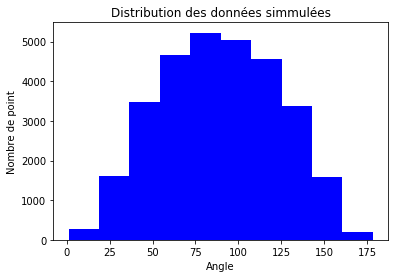

In [16]:
#Distribution des angles dans les données simmulées
plt.hist(Y_simulator , color= 'blue')
plt.title('Distribution des données simmulées')
plt.xlabel("Angle")
plt.ylabel('Nombre de point')

#### Remarque sur la distribution:
Distribution assez équilibrée

In [17]:
#On concatenne les anciens sets de donnée et le set des données simmulées
X = np.concatenate([X_simulator , X_couloir_1, X_couloir_2 , X_couloir_3, X_parking])
Y_angle = np.concatenate([Y_simulator , Y_angle_couloir_1, Y_angle_couloir_2, Y_angle_couloir_3, Y_angle_parking])

In [18]:
#On enlève les données où on a marche arrière
truncate = list(np.where(Y_angle>180)[0])

X_angle = np.delete(X , truncate , axis = 0)
Y_angle = np.delete(Y_angle , truncate , axis = 0)

In [19]:
print ('The le nombre de point dans notre dataset est' , X_angle.shape[0])

The le nombre de point dans notre dataset est 42307


In [20]:
#On transforme les en classes
if args['number_of_classes'] == 5:
    #Pour 5 classes
    Y_angle[list(np.where(Y_angle<=35))] = 0
    Y_angle[list(np.where((Y_angle>35) & (Y_angle<=75)))] = 1
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=110)))] = 2
    Y_angle[list(np.where((Y_angle>110) & (Y_angle<=145)))] = 3
    Y_angle[list(np.where((Y_angle>145) & (Y_angle<=180)))] = 4
    
else:
    #Pour 7 classes
    Y_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite
    Y_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite
    Y_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit
    Y_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche
    Y_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche
    Y_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche

Text(0.5, 1.0, 'La distribution des angles dans l ancien set de donnée')

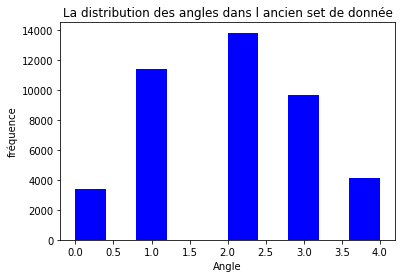

In [21]:
plt.hist(Y_angle  , color = 'blue' )
plt.xlabel('Angle')
plt.ylabel('fréquence')
plt.title('La distribution des angles dans l ancien set de donnée')

### Remarques sur la distribution des données
On remarque que la distribution compte plus de <b> forte gauche </b>que de<b> forte droite  </b> et plus de <b>droite </b> que de<b> gauche  </b>chose qui peut biaiser les résultats, pour régler ce problème nous allos créer de nouvelle donnée en inversant l'image des fortes gauches et de droite.

In [11]:
#On augmente premièrement les données de forte doite pour qu'il soit égale à ceux de forte gauche;
#On augmente ensuite les données de gauche pour qu'il soit égale à ceux de droite
EL = np.where(Y_angle == 4)[0]
print('Le nombre de forte gauche est', len(EL))

ER = np.where(Y_angle == 0)[0]
print('Le nombre de forte doite est', len(ER))

L = np.where(Y_angle == 3)[0]
print('Le nombre de gauche est', len(L))

R = np.where(Y_angle == 1)[0]
print('Le nombre de doite est', len(R))

print('Le nombre de forte droite qui doit être généré est', len(EL)-len(ER))
print('La proportion de forte droite_ générere est', (len(EL)-len(ER))/len(EL))

print('Le nombre de gauche qui doit être généré est', len(R)-len(L))
print('La proportion de gauche générere est', (len(R)-len(L))/len(R))

Le nombre de forte gauche est 4088
Le nombre de forte doite est 3379
Le nombre de gauche est 9645
Le nombre de doite est 11385
Le nombre de forte droite qui doit être généré est 709
La proportion de forte droite_ générere est 0.17343444227005872
Le nombre de gauche qui doit être généré est 1740
La proportion de gauche générere est 0.152832674571805


In [12]:
#AUGMENTATION DES FORTES DROITES et des GAUCHES
if args['augmentation']:
    X_flip_ER, Y_flip_ER = f.generate_horizontal_flip(X[EL], Y_angle[EL], proportion = 0.17)
    X_flip_L, Y_flip_L = f.generate_horizontal_flip(X[R], Y_angle[R], proportion = 0.15)

100%|██████████| 1707/1707 [00:00<00:00, 426780.93it/s]


In [13]:
X_angle = np.concatenate((X_angle , X_flip_ER , X_flip_L))
Y_angle = np.concatenate((Y_angle , Y_flip_ER , Y_flip_L))

In [14]:
print('The new number of points is' , X_angle.shape[0])

The new number of points is 44708


Text(0.5, 1.0, 'La nouvelle distribution des angles dans l ancien set de donnée')

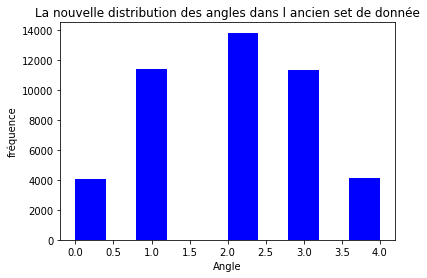

In [15]:
plt.hist(Y_angle , color = 'blue')
plt.xlabel('Angle')
plt.ylabel('Nombre de point')
plt.title('La nouvelle distribution des angles dans l ancien set de donnée')

### Train-test split

In [16]:
#Train test split 
X_train , X_test, Y_train , Y_test = train_test_split(X_angle , Y_angle , test_size = 0.2, stratify = Y_angle)

In [17]:
#Train val split
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.2, stratify = Y_train)

In [18]:
print('The number of points in the training set is' , X_train.shape[0])
print('The number of points in the validation set is' , X_val.shape[0])
print('The number of points in the test set is' , X_test.shape[0])

The number of points in the training set is 28612
The number of points in the validation set is 7154
The number of points in the test set is 8942


Text(0.5, 1.0, 'Distribution des angle dans le training set')

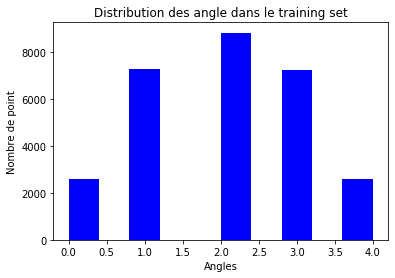

In [19]:
plt.hist(Y_train , color = 'blue')
plt.xlabel('Angles')
plt.ylabel('Nombre de point')
plt.title('Distribution des angle dans le training set')

(array([ 652.,    0., 1822.,    0.,    0., 2210.,    0., 1816.,    0.,
         654.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

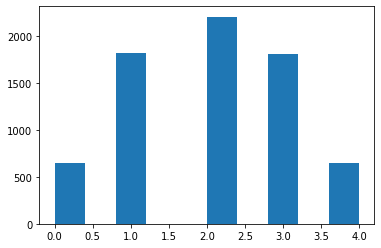

In [20]:
plt.hist(Y_val , color = 'blue')
plt.xlabel('Angles')
plt.ylabel('Nombre de point')
plt.title('Distribution des angle dans le validation set')

(array([ 815.,    0., 2277.,    0.,    0., 2762.,    0., 2270.,    0.,
         818.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

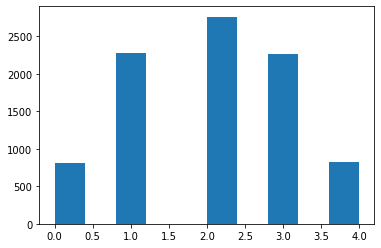

In [21]:
plt.hist(Y_test , color = 'blue')
plt.xlabel('Angles')
plt.ylabel('Nombre de point')
plt.title('Distribution des angle dans le test set')

In [24]:
#Avoir une dummie_variable

Y_train_output = np.zeros((Y_train.shape[0] ,args['number_of_classes'] ))
Y_val_output = np.zeros((Y_val.shape[0] , args['number_of_classes']))
Y_test_output = np.zeros((Y_test.shape[0] , args['number_of_classes']))

for i in range(Y_train.shape[0]):
    n = int(Y_train[i])
    Y_train_output[i , n] = 1

for i in range (Y_val.shape[0]):
    n = int(Y_val[i])
    Y_val_output[i , n] = 1
    
for i in range(Y_test.shape[0]):
    n = int(Y_test[i])
    Y_test_output[i , n] = 1

## Prediction

### Importation du modèle

In [29]:
model_path = '../Models/classification_angle_final'
# Create autopilot model from architectures and print summary
model =  architecture.model_categorical(input_size= (90,250,3))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_16 (Batc (None, 43, 123, 24)       96        
_________________________________________________________________
activation_16 (Activation)   (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_17 (Batc (None, 20, 60, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 20, 60, 32)        0         
__________

### Entrainement du modèle

In [30]:
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_acc', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='max')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,Y_train_output,
                nb_epoch=args['epochs'], 
                validation_data=(X_val, Y_val_output),
                callbacks = callbacks_list,
                batch_size = 64,
                )

Train on 28612 samples, validate on 7154 samples
Epoch 1/50
28612/28612 [==============================] - 17s 595us/step - loss: 0.9368 - acc: 0.6205 - val_loss: 1.7456 - val_acc: 0.3010

Epoch 00001: val_acc improved from -inf to 0.30095, saving model to ../Models/classification_angle_final_test.hdf5
Epoch 2/50
28612/28612 [==============================] - 16s 548us/step - loss: 0.6238 - acc: 0.7484 - val_loss: 0.8026 - val_acc: 0.6982

Epoch 00002: val_acc improved from 0.30095 to 0.69821, saving model to ../Models/classification_angle_final_test.hdf5
Epoch 3/50
28612/28612 [==============================] - 16s 560us/step - loss: 0.5290 - acc: 0.7835 - val_loss: 0.5371 - val_acc: 0.7852

Epoch 00003: val_acc improved from 0.69821 to 0.78516, saving model to ../Models/classification_angle_final_test.hdf5
Epoch 4/50
28612/28612 [==============================] - 20s 683us/step - loss: 0.4502 - acc: 0.8173 - val_loss: 0.4671 - val_acc: 0.8085

Epoch 00004: val_acc improved from 0.785

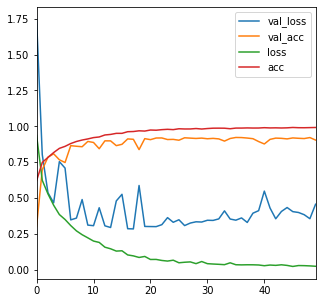

In [31]:
#Plot de l'historique de l'entrainement
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf.plot(figsize = (5 , 5))

In [32]:
#On importe le modèle qui nous intéresse

from keras.models import load_model
model = load_model('../Models/classification_angle_final.hdf5')

### Test the model

In [33]:
#We make the prediction
Y_predicted = model.predict(X_test)

In [34]:
#On transforme la probabilité en classe
Y_pred = np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    Y_pred[i] =np.argmax(Y_predicted[i]) 

In [35]:
#On transforme la probabilité en classe
Y_pred = np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    Y_pred[i] =np.argmax(Y_predicted[i]) 

In [36]:
from sklearn.metrics import classification_report

Report = classification_report(Y_test , Y_pred)

In [37]:
print(Report)

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       815
         1.0       0.94      0.93      0.93      2277
         2.0       0.92      0.93      0.92      2762
         3.0       0.92      0.91      0.92      2270
         4.0       0.91      0.93      0.92       818

    accuracy                           0.92      8942
   macro avg       0.92      0.92      0.92      8942
weighted avg       0.92      0.92      0.92      8942



# 2- Freinage

## Preprocessing 

In [19]:
#On discrétise pour freinage et non freinage
#On considère que les vitesses inférieures à 5 sont des freinages
#Pour la première séquence
Y_acc_1 = np.zeros(Y_speed_1.shape[0])

for i in range (Y_speed_1.shape[0]):
    if Y_speed_1[i]<5:
        Y_acc_1[i] = 1
        
#Pour la deuxième séquence
Y_acc_2 = np.zeros(Y_speed_2.shape[0])

for i in range (Y_speed_2.shape[0]):
    if Y_speed_2[i]<5:
        Y_acc_2[i] = 1 

#Pour la toisième séquence
Y_acc_3 = np.zeros(Y_speed_3.shape[0])

for i in range (Y_speed_3.shape[0]):
    if Y_speed_3[i]<5:
        Y_acc_3[i] = 1

#Pour la quatriière séquence
Y_acc_4 = np.zeros(Y_speed_4.shape[0])

for i in range (Y_speed_4.shape[0]):
    if Y_speed_4[i]<5:
        Y_acc_4[i] = 1

In [20]:
#On concatène toute la data
X_speed = np.concatenate([X_1 , X_2 , X_3 , X_4]) 
Y_acc =np.concatenate([Y_acc_1 , Y_acc_2 ,  Y_acc_3 , Y_acc_4])
Y_angle = np.concatenate([Y_angle_1 , Y_angle_2 , Y_angle_3 , Y_angle_4])

In [21]:
#Pour les données de freinage
Y_angle[list(np.where(Y_angle == 270)[0])] = 90

In [22]:
#Enlever les angles correspondant à des marches arrières
truncate = list(np.where(Y_angle>180)[0])

X_speed = np.delete(X_speed , truncate , axis = 0)
Y_angle = np.delete(Y_angle , truncate , axis = 0)
Y_acc = np.delete(Y_acc, truncate , axis = 0)

In [23]:
#On transforme les angles en classe
#Pour 5 classes
if args['number_of_classes'] == 5:
    #Pour 5 classes
    Y_angle[list(np.where(Y_angle<=35))] = 0
    Y_angle[list(np.where((Y_angle>35) & (Y_angle<=75)))] = 1
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=110)))] = 2
    Y_angle[list(np.where((Y_angle>110) & (Y_angle<=145)))] = 3
    Y_angle[list(np.where((Y_angle>145) & (Y_angle<=180)))] = 4
    
else:
    #Pour 7 classes
    Y_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite
    Y_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite
    Y_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit
    Y_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche
    Y_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche
    Y_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche

(array([ 379.,    0., 1088.,    0.,    0., 2381.,    0., 1412.,    0.,
        1040.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

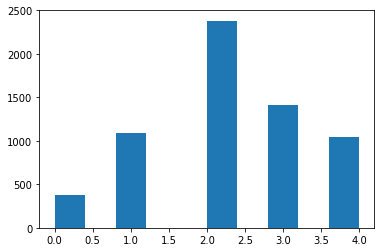

In [24]:
plt.hist(Y_angle)

#### Remarques sur le plot:
Le nombre d'extrème gauche est plus grand que celui d'extrème droite
Le nombre de gauche est plus grand que celui des droites

In [25]:
#On augmente premièrement les données de forte doite pour qu'il soit égale à ceux de forte gauche Pour faire cela on inverse l'image
#On retrouve les imaages de forte gauche
EL = np.where(Y_angle == 4)[0]
print('Le nombre de forte gauche est', len(EL))

ER = np.where(Y_angle == 0)[0]
print('Le nombre de forte doite est', len(ER))

L = np.where(Y_angle == 3)[0]
print('Le nombre de gauche est', len(L))

R = np.where(Y_angle == 1)[0]
print('Le nombre de doite est', len(R))

print('Le nombre de forte droite qui doit être généré est', len(EL)-len(ER))
print('La proportion de forte droite_ générere est', (len(EL)-len(ER))/len(EL))

print('Le nombre de droite qui doit être généré est', len(L)-len(R))
print('La proportion de gauche générere est', (len(L)-len(R))/len(L))

Le nombre de forte gauche est 1040
Le nombre de forte doite est 379
Le nombre de gauche est 1412
Le nombre de doite est 1088
Le nombre de forte droite qui doit être généré est 661
La proportion de forte droite_ générere est 0.635576923076923
Le nombre de droite qui doit être généré est 324
La proportion de gauche générere est 0.22946175637393768


In [26]:
#AUGMENTATION DES FORTES DROITES et des gauches
if args['augmentation']:
    X_flip_ER, Y_flip_ER, Y_flip_ER_acc= f.generate_horizontal_flip_speed(X_speed[EL], Y_angle[EL] , Y_acc[EL], proportion = 0.17)
    X_flip_R, Y_flip_R, Y_flip_R_acc = f.generate_horizontal_flip_speed(X_speed[L], Y_angle[L], Y_acc[L] , proportion = 0.15)

100%|██████████| 211/211 [00:00<00:00, 265207.71it/s]


In [27]:
X_speed = np.concatenate((X_speed , X_flip_ER , X_flip_R))
Y_angle = np.concatenate((Y_angle , Y_flip_ER , Y_flip_R))
Y_acc = np.concatenate((Y_acc , Y_flip_ER_acc , Y_flip_R_acc))

Text(0.5, 1.0, 'La nouvelle distribution des angles dans le nouveau set de donnée')

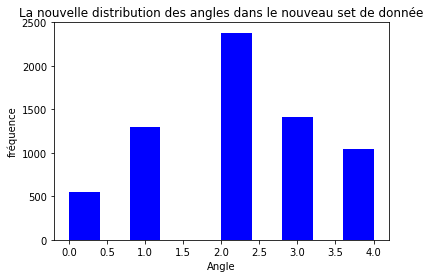

In [28]:
plt.hist(Y_angle , color = 'blue')
plt.xlabel('Angle')
plt.ylabel('fréquence')
plt.title('La nouvelle distribution des angles dans le nouveau set de donnée')

Text(0.5, 1.0, 'La distribution des commandes de freinage dans le nouveau set de donnée')

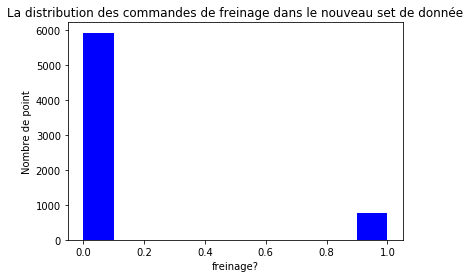

In [29]:
plt.hist(Y_acc , color = 'blue')
plt.xlabel('freinage?')
plt.ylabel('Nombre de point')
plt.title('La distribution des commandes de freinage dans le nouveau set de donnée')

### Train-test split

In [30]:
Y_speed = np.concatenate([np.array([Y_acc]) , np.array([Y_angle])] , axis = 0)
Y_speed = Y_speed.T

In [31]:
#train-test split
X_train , X_test , Y_train , Y_test = train_test_split(X_speed , Y_speed , test_size = 0.2 , stratify = Y_acc)

In [32]:
#train-val split
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.2 , stratify = Y_train[: , 0])

In [33]:
print('The number of data points in the training set is' , X_train.shape[0])
print('The number of data points in the validation set is' , X_val.shape[0])
print('The number of data points in the test set is' , X_test.shape[0])


The number of data points in the training set is 4279
The number of data points in the validation set is 1070
The number of data points in the test set is 1338


In [34]:
Y_acc_train = Y_train[: , 0]
Y_angle_train = Y_train[: , 1]

Y_acc_val = Y_val[: , 0]
Y_angle_val = Y_val[: , 1]

Y_acc_test = Y_test[: , 0]
Y_angle_test = Y_test[: , 1]

In [35]:
#dummy vector
Y_angle_train_output = np.zeros((Y_angle_train.shape[0] , args['number_of_classes']))
Y_angle_val_output = np.zeros((Y_angle_val.shape[0] , args['number_of_classes']))
Y_angle_test_output = np.zeros((Y_angle_test.shape[0] , args['number_of_classes']))

for i in range(Y_angle_train.shape[0]):
    n = int(Y_angle_train[i])
    Y_angle_train_output[i , n] = 1

for i in range (Y_angle_val.shape[0]):
    n = int(Y_angle_val[i])
    Y_angle_val_output[i , n] = 1
    
for i in range(Y_angle_test.shape[0]):
    n = int(Y_angle_test[i])
    Y_angle_test_output[i , n] = 1

## Prediction en utilisant Transfer learning

### Importer le modèle

In [55]:
#Import the base Model

from keras.models import load_model
base_model = load_model('../Models/classification_angle_final.hdf5')

### Adaptation du modèle

In [56]:
base_model.layers.pop() #enlever la Dense pour l'angle
base_model.layers.pop() #Pour la dropout_16
base_model.layers.pop() #Pour la dense 16

In [57]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_16 (Batc (None, 43, 123, 24)       96        
_________________________________________________________________
activation_16 (Activation)   (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_17 (Batc (None, 20, 60, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 20, 60, 32)        0         
__________

In [58]:
def transform_model(base_model ,dropout = 0.1 , number_of_classes = 5):
    """
    Inputs:
        -base_model : A Keras Model
        dropout ; the dropou rate
        number_of_classes : The number of classes fro the angle
    Output:
        -A Keras Model
    """
    from keras.layers import Dense , BatchNormalization , Activation ,  Dropout
    from keras.models import Model

    x = base_model.layers[-1].output

    y = Dense(100 , use_bias = False , name = 'Dense_1')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    y = Dense(50 , use_bias = False , name = 'Dense_2')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    speed_out = Dense(1 , activation = 'sigmoid' , name = 'speed_out')(y)
    #---------------------------------------------------------------------------
    z = Dense(100 , use_bias = False , name = 'Dense_3')(x)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)

    z = Dense(50 , use_bias = False , name = 'Dense_4')(z)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)


    angle_out2 = Dense(number_of_classes, activation='softmax', name='angle_out')(z)  
    #-----------------------------------------------------------------
    model = Model(input=base_model.input , output=[angle_out2 , speed_out])

    model.compile(optimizer='adam',

                  loss={'angle_out':'categorical_crossentropy' , 
                        'speed_out' : 'binary_crossentropy'},

                  metrics={'angle_out' : 'accuracy',
                           'speed_out' : 'accuracy'}
                 )
    return model

In [59]:
model = transform_model(base_model , 0.5 , 5)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 43, 123, 24)  96          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_16 (Activation)      (None, 43, 123, 24)  0           batch_normalization_16[0][0]     
__________________________________________________________________________________________________
conv2d_17 

### Entrainement du modèle

In [60]:
#Calcul du ratio n_ones/n_points
n_ones = np.where(Y_acc_train == 1)[0].shape[0]
n_zeros = np.where(Y_acc_train == 0)[0].shape[0]
print(n_ones/(n_ones+n_zeros))

0.11357793877074082


In [61]:
import keras
model_path = '../Models/classification_angle_speed_final'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=50, 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.12, 1: 0.88}} 
                )

Train on 4279 samples, validate on 1070 samples
Epoch 1/50
4279/4279 [==============================] - 6s 1ms/step - loss: 1.8048 - angle_out_loss: 1.6718 - speed_out_loss: 0.1330 - angle_out_acc: 0.3176 - speed_out_acc: 0.6759 - val_loss: 1.6487 - val_angle_out_loss: 1.2219 - val_speed_out_loss: 0.4268 - val_angle_out_acc: 0.5523 - val_speed_out_acc: 0.7710

Epoch 00001: val_speed_out_loss improved from inf to 0.42678, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 2/50
4279/4279 [==============================] - 3s 677us/step - loss: 1.3594 - angle_out_loss: 1.2644 - speed_out_loss: 0.0950 - angle_out_acc: 0.4987 - speed_out_acc: 0.7380 - val_loss: 1.3657 - val_angle_out_loss: 0.9998 - val_speed_out_loss: 0.3659 - val_angle_out_acc: 0.6028 - val_speed_out_acc: 0.8411

Epoch 00002: val_speed_out_loss improved from 0.42678 to 0.36591, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 3/50
4279/4279 [==============================] 


Epoch 00020: val_speed_out_loss did not improve from 0.08621
Epoch 21/50
4279/4279 [==============================] - 3s 637us/step - loss: 0.1217 - angle_out_loss: 0.1104 - speed_out_loss: 0.0113 - angle_out_acc: 0.9689 - speed_out_acc: 0.9804 - val_loss: 0.6597 - val_angle_out_loss: 0.5194 - val_speed_out_loss: 0.1402 - val_angle_out_acc: 0.8533 - val_speed_out_acc: 0.9607

Epoch 00021: val_speed_out_loss did not improve from 0.08621
Epoch 22/50
4279/4279 [==============================] - 3s 696us/step - loss: 0.0949 - angle_out_loss: 0.0847 - speed_out_loss: 0.0103 - angle_out_acc: 0.9783 - speed_out_acc: 0.9839 - val_loss: 0.6069 - val_angle_out_loss: 0.4743 - val_speed_out_loss: 0.1325 - val_angle_out_acc: 0.8748 - val_speed_out_acc: 0.9570

Epoch 00022: val_speed_out_loss did not improve from 0.08621
Epoch 23/50
4279/4279 [==============================] - 3s 677us/step - loss: 0.0880 - angle_out_loss: 0.0771 - speed_out_loss: 0.0109 - angle_out_acc: 0.9792 - speed_out_acc: 0.9

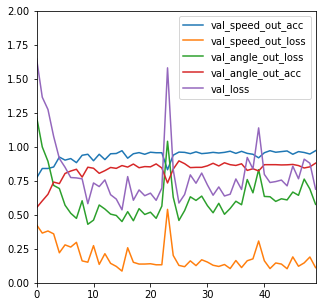

In [62]:
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_speed_out_acc' , 'val_speed_out_loss' , 'val_angle_out_loss' , 'val_angle_out_acc' , 'val_loss']].plot( figsize = (5 , 5) )
plt.ylim(0 , 2)
plt.show()

In [63]:
#On garde le meilleur modèle
from keras.models import load_model
model = load_model('../Models/classification_angle_speed_final.hdf5')

### Test du modèle

In [154]:
Y_predicted = model.predict(X_test)

In [155]:
#Transformer la proba en classe
Y_pred_angle = np.zeros(Y_predicted[0].shape[0])
for i in range(Y_predicted[0].shape[0]):
    Y_pred_angle[i] =np.argmax(Y_predicted[0][i]) 

In [156]:
#Transformer la proba en classe
Y_pred_speed = np.zeros(Y_predicted[1].shape[0])
for i in range(Y_predicted[1].shape[0]):
    if Y_predicted[1][i]>0.5:
        Y_pred_speed[i] = 1

In [157]:
from sklearn.metrics import classification_report

Report_angle = classification_report(Y_angle_test , Y_pred_angle)
Report_speed = classification_report(Y_acc_test , Y_pred_speed)

In [68]:
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       119
         1.0       0.86      0.86      0.86       260
         2.0       0.86      0.88      0.87       473
         3.0       0.81      0.86      0.84       272
         4.0       0.94      0.91      0.92       214

    accuracy                           0.87      1338
   macro avg       0.89      0.87      0.88      1338
weighted avg       0.87      0.87      0.87      1338



In [69]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1186
         1.0       0.76      0.91      0.83       152

    accuracy                           0.96      1338
   macro avg       0.87      0.94      0.90      1338
weighted avg       0.96      0.96      0.96      1338



# Test d'autres possibilités de Transfer Learning

## a-Test avec la "dense8 & dropout_12" : ON

In [6]:
from keras.models import load_model

base_model = load_model("../Models/classification_angle_final.hdf5")
base_model.summary()

W0902 10:42:24.994355 140705347479360 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 10:42:25.023502 140705347479360 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 10:42:25.052240 140705347479360 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 10:42:25.053256 140705347479360 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Pleas

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_16 (Batc (None, 43, 123, 24)       96        
_________________________________________________________________
activation_16 (Activation)   (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_17 (Batc (None, 20, 60, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 20, 60, 32)        0         
__________

In [7]:
base_model.layers.pop()  #enlever la dense pour l'angle_out

In [8]:
base_model.summary() #Résumer après transformation

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_16 (Batc (None, 43, 123, 24)       96        
_________________________________________________________________
activation_16 (Activation)   (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_17 (Batc (None, 20, 60, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 20, 60, 32)        0         
__________

/home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [13]:
def transform_model(base_model ,dropout = 0.1 , number_of_classes = 5):
    """
    Inputs:
        -base_model : A Keras Model
        dropout ; the dropou rate
        number_of_classes : The number of classes fro the angle
    Output:
        -A Keras Model
    """
    from keras.layers import Dense , BatchNormalization , Activation ,  Dropout
    from keras.models import Model

    x = base_model.layers[-1].output

    y = Dense(100 , use_bias = False , name = 'Dense_1')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    y = Dense(50 , use_bias = False , name = 'Dense_2')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    speed_out = Dense(1 , activation = 'sigmoid' , name = 'speed_out')(y)
    #---------------------------------------------------------------------------
    z = Dense(100 , use_bias = False , name = 'Dense_3')(x)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)

    z = Dense(50 , use_bias = False , name = 'Dense_4')(z)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)


    angle_out2 = Dense(number_of_classes, activation='softmax', name='angle_out')(z)  
    #-----------------------------------------------------------------
    model = Model(input=base_model.input , output=[angle_out2 , speed_out])

    model.compile(optimizer='adam',

                  loss={'angle_out':'categorical_crossentropy' , 
                        'speed_out' : 'binary_crossentropy'},

                  metrics={'angle_out' : 'accuracy',
                           'speed_out' : 'accuracy'}
                 )
    return model

In [14]:
model = transform_model(base_model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=[<tf.Tenso...)`


In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 43, 123, 24)  96          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_16 (Activation)      (None, 43, 123, 24)  0           batch_normalization_16[0][0]     
__________________________________________________________________________________________________
conv2d_17 

### Entrainement du modèle

In [36]:
#Calcul du ratio n_ones/n_points
n_ones = np.where(Y_acc_train == 1)[0].shape[0]
n_zeros = np.where(Y_acc_train == 0)[0].shape[0]
print(n_ones/(n_ones+n_zeros))

0.11357793877074082


In [37]:
import keras
model_path = '../Models/classification_angle_speed_final_test'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=50, 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.12, 1: 0.88}} 
                )

Train on 4279 samples, validate on 1070 samples
Epoch 1/50
4279/4279 [==============================] - 7s 2ms/step - loss: 1.5503 - angle_out_loss: 1.4151 - speed_out_loss: 0.1352 - angle_out_acc: 0.4141 - speed_out_acc: 0.6076 - val_loss: 1.8057 - val_angle_out_loss: 1.1511 - val_speed_out_loss: 0.6547 - val_angle_out_acc: 0.5636 - val_speed_out_acc: 0.5963

Epoch 00001: val_speed_out_loss improved from inf to 0.65469, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 2/50
4279/4279 [==============================] - 4s 923us/step - loss: 1.1088 - angle_out_loss: 1.0016 - speed_out_loss: 0.1072 - angle_out_acc: 0.6015 - speed_out_acc: 0.7013 - val_loss: 1.4004 - val_angle_out_loss: 0.9319 - val_speed_out_loss: 0.4685 - val_angle_out_acc: 0.6393 - val_speed_out_acc: 0.7551

Epoch 00002: val_speed_out_loss improved from 0.65469 to 0.46847, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 3/50
4279/4279 [==============================] 


Epoch 00020: val_speed_out_loss improved from 0.15482 to 0.14638, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 21/50
4279/4279 [==============================] - 4s 926us/step - loss: 0.0666 - angle_out_loss: 0.0563 - speed_out_loss: 0.0102 - angle_out_acc: 0.9832 - speed_out_acc: 0.9834 - val_loss: 0.8649 - val_angle_out_loss: 0.7069 - val_speed_out_loss: 0.1579 - val_angle_out_acc: 0.8206 - val_speed_out_acc: 0.9551

Epoch 00021: val_speed_out_loss did not improve from 0.14638
Epoch 22/50
4279/4279 [==============================] - 4s 928us/step - loss: 0.0759 - angle_out_loss: 0.0684 - speed_out_loss: 0.0074 - angle_out_acc: 0.9787 - speed_out_acc: 0.9855 - val_loss: 1.0745 - val_angle_out_loss: 0.8429 - val_speed_out_loss: 0.2316 - val_angle_out_acc: 0.7542 - val_speed_out_acc: 0.9047

Epoch 00022: val_speed_out_loss did not improve from 0.14638
Epoch 23/50
4279/4279 [==============================] - 4s 926us/step - loss: 0.0822 - angle_out_loss: 0.

4279/4279 [==============================] - 4s 937us/step - loss: 0.0324 - angle_out_loss: 0.0281 - speed_out_loss: 0.0043 - angle_out_acc: 0.9930 - speed_out_acc: 0.9923 - val_loss: 0.8171 - val_angle_out_loss: 0.6878 - val_speed_out_loss: 0.1293 - val_angle_out_acc: 0.8486 - val_speed_out_acc: 0.9664

Epoch 00042: val_speed_out_loss did not improve from 0.12848
Epoch 43/50
4279/4279 [==============================] - 4s 933us/step - loss: 0.0298 - angle_out_loss: 0.0258 - speed_out_loss: 0.0040 - angle_out_acc: 0.9942 - speed_out_acc: 0.9930 - val_loss: 0.9104 - val_angle_out_loss: 0.7269 - val_speed_out_loss: 0.1835 - val_angle_out_acc: 0.8421 - val_speed_out_acc: 0.9514

Epoch 00043: val_speed_out_loss did not improve from 0.12848
Epoch 44/50
4279/4279 [==============================] - 4s 936us/step - loss: 0.0248 - angle_out_loss: 0.0224 - speed_out_loss: 0.0023 - angle_out_acc: 0.9930 - speed_out_acc: 0.9956 - val_loss: 0.8104 - val_angle_out_loss: 0.6910 - val_speed_out_loss: 

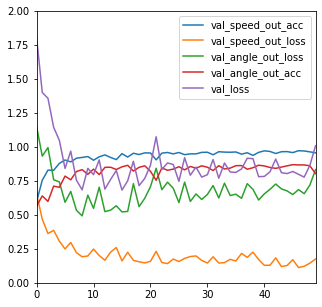

In [38]:
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_speed_out_acc' , 'val_speed_out_loss' , 'val_angle_out_loss' , 'val_angle_out_acc' , 'val_loss']].plot( figsize = (5 , 5) )
plt.ylim(0 , 2)
plt.show()

### Test the model:

In [51]:
#On importe le meilleur modèle

model = load_model('../Models/classification_angle_speed_final_test.hdf5')

In [56]:
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       105
         1.0       0.77      0.84      0.80       255
         2.0       0.86      0.86      0.86       468
         3.0       0.86      0.85      0.86       288
         4.0       0.93      0.89      0.91       222

    accuracy                           0.86      1338
   macro avg       0.86      0.85      0.86      1338
weighted avg       0.86      0.86      0.86      1338



In [57]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1186
         1.0       0.81      0.90      0.85       152

    accuracy                           0.96      1338
   macro avg       0.90      0.94      0.92      1338
weighted avg       0.97      0.96      0.97      1338



#### Commentaire sur les résultats:
Résultats moins bon que ce qui précède donc il vaut mieux enlever la dernière fully connceted quand on effectue le Transfer Learning

## b-Test avec les deux fcs "dense7 & dropout_11 & dense8 & dropout 12" en off:

In [58]:
from keras.models import load_model

base_model = load_model("../Models/classification_angle_final.hdf5")
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_16 (Batc (None, 43, 123, 24)       96        
_________________________________________________________________
activation_16 (Activation)   (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_17 (Batc (None, 20, 60, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 20, 60, 32)        0         
__________

In [59]:
base_model.layers.pop()  #enlever la dense pour l'angle_out
base_model.layers.pop()  #enlever la dense pour la dropout_12
base_model.layers.pop()  #enlever la dense pour la dense_8
base_model.layers.pop()  #enlever la dense pour la dropout_11
base_model.layers.pop()  #enlever la dense pour la dense_7

In [60]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_16 (Batc (None, 43, 123, 24)       96        
_________________________________________________________________
activation_16 (Activation)   (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_17 (Batc (None, 20, 60, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 20, 60, 32)        0         
__________

In [61]:
def transform_model(base_model ,dropout = 0.1 , number_of_classes = 5):
    """
    Inputs:
        -base_model : A Keras Model
        dropout ; the dropou rate
        number_of_classes : The number of classes fro the angle
    Output:
        -A Keras Model
    """
    from keras.layers import Dense , BatchNormalization , Activation ,  Dropout
    from keras.models import Model

    x = base_model.layers[-1].output

    y = Dense(100 , use_bias = False , name = 'Dense_1')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    y = Dense(50 , use_bias = False , name = 'Dense_2')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    speed_out = Dense(1 , activation = 'sigmoid' , name = 'speed_out')(y)
    #---------------------------------------------------------------------------
    z = Dense(100 , use_bias = False , name = 'Dense_3')(x)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)

    z = Dense(50 , use_bias = False , name = 'Dense_4')(z)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)


    angle_out2 = Dense(number_of_classes, activation='softmax', name='angle_out')(z)  
    #-----------------------------------------------------------------
    model = Model(input=base_model.input , output=[angle_out2 , speed_out])

    model.compile(optimizer='adam',

                  loss={'angle_out':'categorical_crossentropy' , 
                        'speed_out' : 'binary_crossentropy'},

                  metrics={'angle_out' : 'accuracy',
                           'speed_out' : 'accuracy'}
                 )
    return model

In [65]:
model = transform_model(base_model)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 43, 123, 24)  96          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_16 (Activation)      (None, 43, 123, 24)  0           batch_normalization_16[0][0]     
__________________________________________________________________________________________________
conv2d_17 

### Entrainement du modèle

In [66]:
import keras
model_path = '../Models/classification_angle_speed_final_test'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=50, 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.12, 1: 0.88}} 
                )

Train on 4279 samples, validate on 1070 samples
Epoch 1/50
4279/4279 [==============================] - 7s 2ms/step - loss: 1.2729 - angle_out_loss: 1.1695 - speed_out_loss: 0.1034 - angle_out_acc: 0.5387 - speed_out_acc: 0.6434 - val_loss: 1.4772 - val_angle_out_loss: 0.9527 - val_speed_out_loss: 0.5245 - val_angle_out_acc: 0.6206 - val_speed_out_acc: 0.7710

Epoch 00001: val_speed_out_loss improved from inf to 0.52446, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 2/50
4279/4279 [==============================] - 4s 885us/step - loss: 0.8439 - angle_out_loss: 0.7882 - speed_out_loss: 0.0556 - angle_out_acc: 0.7018 - speed_out_acc: 0.8752 - val_loss: 1.0948 - val_angle_out_loss: 0.7192 - val_speed_out_loss: 0.3757 - val_angle_out_acc: 0.7271 - val_speed_out_acc: 0.8486

Epoch 00002: val_speed_out_loss improved from 0.52446 to 0.37568, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 3/50
4279/4279 [==============================] 


Epoch 00020: val_speed_out_loss did not improve from 0.09761
Epoch 21/50
4279/4279 [==============================] - 4s 898us/step - loss: 0.0604 - angle_out_loss: 0.0547 - speed_out_loss: 0.0058 - angle_out_acc: 0.9841 - speed_out_acc: 0.9925 - val_loss: 0.7346 - val_angle_out_loss: 0.5582 - val_speed_out_loss: 0.1764 - val_angle_out_acc: 0.8542 - val_speed_out_acc: 0.9551

Epoch 00021: val_speed_out_loss did not improve from 0.09761
Epoch 22/50
4279/4279 [==============================] - 4s 891us/step - loss: 0.0433 - angle_out_loss: 0.0376 - speed_out_loss: 0.0056 - angle_out_acc: 0.9881 - speed_out_acc: 0.9916 - val_loss: 0.7457 - val_angle_out_loss: 0.5924 - val_speed_out_loss: 0.1533 - val_angle_out_acc: 0.8495 - val_speed_out_acc: 0.9626

Epoch 00022: val_speed_out_loss did not improve from 0.09761
Epoch 23/50
4279/4279 [==============================] - 4s 909us/step - loss: 0.0478 - angle_out_loss: 0.0435 - speed_out_loss: 0.0043 - angle_out_acc: 0.9876 - speed_out_acc: 0.9

4279/4279 [==============================] - 3s 726us/step - loss: 0.0391 - angle_out_loss: 0.0351 - speed_out_loss: 0.0039 - angle_out_acc: 0.9881 - speed_out_acc: 0.9949 - val_loss: 0.8642 - val_angle_out_loss: 0.7033 - val_speed_out_loss: 0.1608 - val_angle_out_acc: 0.8336 - val_speed_out_acc: 0.9561

Epoch 00042: val_speed_out_loss did not improve from 0.09761
Epoch 43/50
4279/4279 [==============================] - 3s 737us/step - loss: 0.0380 - angle_out_loss: 0.0354 - speed_out_loss: 0.0027 - angle_out_acc: 0.9869 - speed_out_acc: 0.9953 - val_loss: 1.9994 - val_angle_out_loss: 1.2856 - val_speed_out_loss: 0.7138 - val_angle_out_acc: 0.7084 - val_speed_out_acc: 0.9112

Epoch 00043: val_speed_out_loss did not improve from 0.09761
Epoch 44/50
4279/4279 [==============================] - 3s 725us/step - loss: 0.0291 - angle_out_loss: 0.0273 - speed_out_loss: 0.0018 - angle_out_acc: 0.9909 - speed_out_acc: 0.9970 - val_loss: 1.1601 - val_angle_out_loss: 0.9159 - val_speed_out_loss: 

###  Test the model

In [67]:
model  = load_model("../Models/classification_angle_speed_final_test.hdf5")

In [72]:
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       105
         1.0       0.79      0.80      0.79       255
         2.0       0.82      0.84      0.83       468
         3.0       0.80      0.82      0.81       288
         4.0       0.89      0.87      0.88       222

    accuracy                           0.83      1338
   macro avg       0.84      0.82      0.83      1338
weighted avg       0.83      0.83      0.83      1338



In [73]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1186
         1.0       0.86      0.82      0.84       152

    accuracy                           0.96      1338
   macro avg       0.92      0.90      0.91      1338
weighted avg       0.96      0.96      0.96      1338



#### Commentaire sur les résultats
Résultats moins bons que ce qui précède

## c-Test avec du freezing

On freeze le modèle déja entrainé et on effectue le fine-tuning sur ce qui reste

In [89]:
base_model = load_model("../Models/classification_angle_final.hdf5")

In [90]:
#On crèe un nouveau modèle similaire à celui d'anvant avec une seule variante c'est la Batch Noramlization qui devient en mode inférence
def create_copy_model (input_size = (90 , 250 , 3) , dropout = 0.1):
    import keras
    from keras.layers import Input, Dense, merge
    from keras.models import Model
    from keras.layers import Conv2D, MaxPooling2D, Reshape, BatchNormalization
    from keras.layers import Activation, Dropout, Flatten, Dense , LSTM , concatenate , core, Reshape 


    
    img_in = Input(shape=input_size, name='img_in')                     
    x = img_in
    
    x = Conv2D(24, 5,5, subsample=(2,2))(x)       
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
    
    x = Conv2D(32, 5,5, subsample=(2,2))(x)   
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
    
    x = Conv2D(64, 5,5, subsample=(2,2))(x)     
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
    
    x = Conv2D(64, (3,3) , subsample=(2,2))(x)       
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
    
    x = Conv2D(64, (3,3) , subsample=(1,1))(x)    
    x = BatchNormalization()(x , training = False)
    x = Activation('relu')(x)
       
    x = Dropout(dropout)(x)


    x = Flatten(name='flattened')(x)                                       
    x = Dense(1024, activation='relu')(x)                                   
    x = Dropout(dropout)(x)
    x = Dense(50, activation='relu')(x)                                     
    x = Dropout(dropout)(x)                                                      
    
    #categorical output of the angle
    angle_out = Dense(5, activation='softmax', name='angle_out')(x)       
    model = Model(inputs = img_in, outputs = angle_out)
    
    model.compile(optimizer='adam',
                  loss={
                      'angle_out' : 'categorical_crossentropy'                       } ,
                  
                  metrics={
                      'angle_out' : 'accuracy'                          }
                           )
    return model

In [139]:
copy_model = create_copy_model()

In [140]:
#copy the weights
copy_model.set_weights(base_model.get_weights())

In [141]:
copy_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_63 (Batc (None, 43, 123, 24)       96        
_________________________________________________________________
activation_63 (Activation)   (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_64 (Batc (None, 20, 60, 32)        128       
_________________________________________________________________
activation_64 (Activation)   (None, 20, 60, 32)        0         
__________

In [142]:
copy_model.layers.pop() #Angle_out
copy_model.layers.pop() #dropout_30
copy_model.layers.pop()  #Dense_4

In [143]:
model = transform_model(copy_model)

In [144]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 43, 123, 24)  96          conv2d_29[0][0]                  
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 43, 123, 24)  0           batch_normalization_63[0][0]     
__________________________________________________________________________________________________
conv2d_30 

In [145]:
#Essaie en gardant 5 couches de convolution
for layer in model.layers[:20]:
    print(layer.name)
    layer.trainable = False
print('--------------------------------------')

for layer in model.layers[20:]:
    print(layer.name)
    layer.trainable = True


img_in
conv2d_29
batch_normalization_63
activation_63
conv2d_30
batch_normalization_64
activation_64
conv2d_31
batch_normalization_65
activation_65
conv2d_32
batch_normalization_66
activation_66
conv2d_33
batch_normalization_67
activation_67
dropout_49
flattened
dense_9
dropout_50
--------------------------------------
Dense_3
Dense_1
batch_normalization_70
batch_normalization_68
activation_70
activation_68
dropout_54
dropout_52
Dense_4
Dense_2
batch_normalization_71
batch_normalization_69
activation_71
activation_69
dropout_55
dropout_53
angle_out
speed_out


### Training the model

In [146]:
import keras
model_path = '../Models/classification_angle_speed_final_freezing'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=50, 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.12, 1: 0.88}} 
                )

Train on 4279 samples, validate on 1070 samples
Epoch 1/50
4279/4279 [==============================] - 10s 2ms/step - loss: 1.4572 - angle_out_loss: 1.3563 - speed_out_loss: 0.1009 - angle_out_acc: 0.4690 - speed_out_acc: 0.7118 - val_loss: 1.4018 - val_angle_out_loss: 1.0998 - val_speed_out_loss: 0.3021 - val_angle_out_acc: 0.5850 - val_speed_out_acc: 0.8822

Epoch 00001: val_loss improved from inf to 1.40184, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 2/50
4279/4279 [==============================] - 3s 628us/step - loss: 0.9177 - angle_out_loss: 0.8535 - speed_out_loss: 0.0642 - angle_out_acc: 0.6742 - speed_out_acc: 0.8444 - val_loss: 1.1336 - val_angle_out_loss: 0.7492 - val_speed_out_loss: 0.3844 - val_angle_out_acc: 0.7131 - val_speed_out_acc: 0.8467

Epoch 00002: val_loss improved from 1.40184 to 1.13356, saving model to ../Models/classification_angle_speed_final_test.hdf5
Epoch 3/50
4279/4279 [==============================] - 3s 633us/step - l

4279/4279 [==============================] - 3s 640us/step - loss: 0.0603 - angle_out_loss: 0.0546 - speed_out_loss: 0.0057 - angle_out_acc: 0.9822 - speed_out_acc: 0.9900 - val_loss: 0.6413 - val_angle_out_loss: 0.4665 - val_speed_out_loss: 0.1749 - val_angle_out_acc: 0.8841 - val_speed_out_acc: 0.9523

Epoch 00021: val_loss did not improve from 0.54045
Epoch 22/50
4279/4279 [==============================] - 3s 636us/step - loss: 0.0455 - angle_out_loss: 0.0417 - speed_out_loss: 0.0038 - angle_out_acc: 0.9883 - speed_out_acc: 0.9928 - val_loss: 0.6686 - val_angle_out_loss: 0.4771 - val_speed_out_loss: 0.1915 - val_angle_out_acc: 0.8785 - val_speed_out_acc: 0.9523

Epoch 00022: val_loss did not improve from 0.54045
Epoch 23/50
4279/4279 [==============================] - 3s 635us/step - loss: 0.0469 - angle_out_loss: 0.0411 - speed_out_loss: 0.0058 - angle_out_acc: 0.9874 - speed_out_acc: 0.9918 - val_loss: 0.6357 - val_angle_out_loss: 0.5149 - val_speed_out_loss: 0.1209 - val_angle_o

4279/4279 [==============================] - 3s 638us/step - loss: 0.0334 - angle_out_loss: 0.0300 - speed_out_loss: 0.0034 - angle_out_acc: 0.9909 - speed_out_acc: 0.9953 - val_loss: 0.7592 - val_angle_out_loss: 0.5917 - val_speed_out_loss: 0.1676 - val_angle_out_acc: 0.8794 - val_speed_out_acc: 0.9636

Epoch 00043: val_loss did not improve from 0.54045
Epoch 44/50
4279/4279 [==============================] - 3s 637us/step - loss: 0.0434 - angle_out_loss: 0.0412 - speed_out_loss: 0.0022 - angle_out_acc: 0.9888 - speed_out_acc: 0.9970 - val_loss: 0.7267 - val_angle_out_loss: 0.5698 - val_speed_out_loss: 0.1568 - val_angle_out_acc: 0.8794 - val_speed_out_acc: 0.9645

Epoch 00044: val_loss did not improve from 0.54045
Epoch 45/50
4279/4279 [==============================] - 3s 638us/step - loss: 0.0375 - angle_out_loss: 0.0344 - speed_out_loss: 0.0031 - angle_out_acc: 0.9897 - speed_out_acc: 0.9942 - val_loss: 0.7499 - val_angle_out_loss: 0.5773 - val_speed_out_loss: 0.1727 - val_angle_o

### Testing

In [151]:
model = load_model('../Models/classification_angle_speed_final_freezing.hdf5')

In [158]:
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       105
         1.0       0.82      0.83      0.83       255
         2.0       0.88      0.89      0.88       468
         3.0       0.83      0.86      0.84       288
         4.0       0.95      0.88      0.91       222

    accuracy                           0.87      1338
   macro avg       0.87      0.86      0.87      1338
weighted avg       0.87      0.87      0.87      1338



In [159]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1186
         1.0       0.84      0.90      0.87       152

    accuracy                           0.97      1338
   macro avg       0.91      0.94      0.93      1338
weighted avg       0.97      0.97      0.97      1338



#### Commentaires sur les résultats

Les résultats pas très différents de ce qui précède donc il vaut mieux rester sur le modèle précédent normal sans freezing.